In [25]:
import cellpose
import dask.array as da
import napari
from skimage.io import imshow,  imsave
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

### Load images from zarr 

In [12]:
gfp = da.from_zarr('/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/tzxy_stack_ch1.zarr/')
rfp = da.from_zarr('/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/tzxy_stack_ch2.zarr/')

### Compress z-stacks into maximum projections

In [13]:
gfp = da.sum(gfp, axis = 1)
rfp = da.sum(rfp, axis = 1)

In [14]:
gfp

dask.array<sum-aggregate, shape=(75, 6048, 6048), dtype=uint64, chunksize=(1, 2160, 2160), chunktype=numpy.ndarray>

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


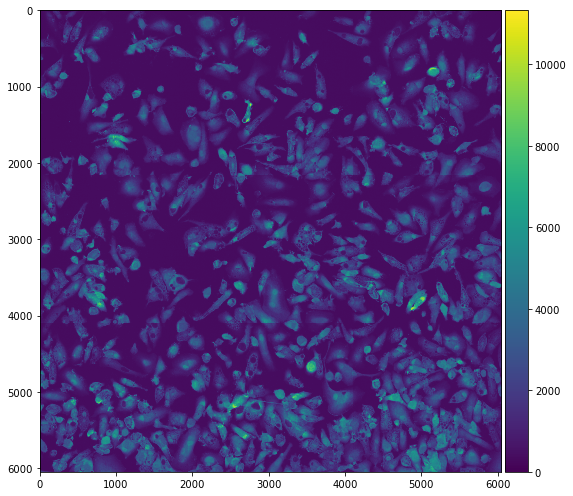

In [21]:
imshow(gfp[0])

## Save out first frame as tiff for testing default cellpose on 

In [27]:
imsave('test.tiff', gfp[0])

/tmp/ipykernel_1206784/1145501843.py:1: UserWarning: test.tiff is a low contrast image
  imsave('test.tiff', gfp[0])


# Cellpose segmentation

Following the instructions at https://github.com/MouseLand/cellpose/blob/main/notebooks/run_cellpose_2.ipynb

In [22]:
!pip install "opencv-python-headless<4.3"
!pip install cellpose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 34.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [24]:
!nvcc --version
!nvidia-smi

import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Tue Jul 26 14:27:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A6000    On   | 00000000:65:00.0  On |                  Off |
| 30%   38C    P8    33W / 300W |   1888MiB / 49140MiB |      5%      Default |
|                               |                      |                  N/A |
+

In [ ]:
from natsort import natsorted
url = 'https://drive.google.com/uc?id=1HXpLczf7TPCdI1yZY5KV3EkdWzRrgvhQ'
utils.download_url_to_file(url, 'human_in_the_loop.zip')

!unzip human_in_the_loop
train_files = natsorted(glob('human_in_the_loop/train/*.tif'))
# train_seg = natsorted(glob('human_in_the_loop/train/*.npy'))

test_files = natsorted(glob('human_in_the_loop/test/*.npy'))
test_seg = natsorted(glob('human_in_the_loop/test/*.npy'))